## Brief Introduction on ECG and ECG signal:-
    
   *Electrocardiogram (ECG) is the most commonly used biomedical signal in clinical diagnostics of the heart. 
    The word “electrocardiogram” is a combination of three words: electro, pertaining to electric signal; cardio,
    which translates into heart; and gram, which stands for recording. The recording of the electric activity of the heart
    is called ECG.A cardiac muscle contraction is a direct result of the cellular electric excitation described by the ECG. 
    The depolarization initiates the shortening of each individual muscle cell. The electric activation of each cell is an 
    indication of the functioning of that cell. Therefore, the ECG is the result of depolarization of the heart muscle in a 
    controlled repetitive fashion. By tracking the process of electric depolarization of the cardiac muscle cells, an
    impression of the heart’s functionality can be formed and used to recognize regions in the heart structure that are 
    not functioning to specifications and may require medical attention. Any deviation from the typical ECG observed in 
    the recorded electric depolarization signal is analyzed and classified as a certain cardiac disorder.
    
   ### Signals:-
      a) Noise Filtering :  
      
               Design of filters for removing baseline wander and powerline interference; both types of disturbance imply the
               design of a narrowband filter. ensemble averaging techniques can be successfully applied to time-aligned 
               heart rate for reduction of muscle noise. Baseline wander is essential to find the lowest frequency component 
               of the ECG spectrum. the slowest heart rate is considered to define this frequency component. powerline
               represent a common noise source in the ECG that is characterized by 50 Hz.
      b) QRS Detection:
                The QRS detection block detects peaks of the filtered ECG signal in actual time. The detection threshold is
                automatically adjusted based on the mean estimate of the average QRS peak and the average noise peak. The
                detected peak is analyze as a QRS complex or as noise, depending on whether it is above the threshold.
      c) Wave delineation:
                Wave delineation is determination of peaks and boundaries of the waves. Filtering, Basic expansion, 
                Classification and pattern reorganization, Bayesian inference are the existing methods of delineation. 
                The QRS detector is designed to detect heartbeats, while not producing occurrence times of the QRS complexes 
                with high temporal resolution.
      d) Data Compression:
                The volume of ECG data is necessarily large, as a long period of time is required to gather enough 
                information about the patient. We can get the compress data through direct method, transform-based data 
                compression,performance evaluation. Compression ratio (CR) is the size of the compressed data to the 
                original data and execution time. 
        
     


 The length of the file is: 43081

 The length of the time array is:43081


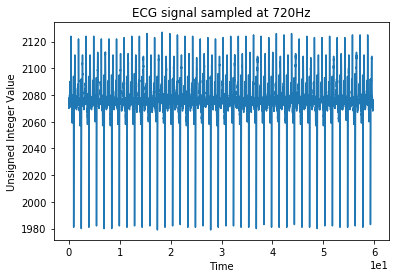

In [158]:
##(4) Opens the provided ECG signal (aami3a.dat) and plots it.This file contains one ECG signal sampled at 720Hz with 12-bit resolution?

##import files
%matplotlib inline

#now we import different packages that will allow to do math, lineal algebra, numerical operations, array operations and plotting
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt


#we use a simple open command for the file (basic Python)
Fname =open("aami3a.dat",'rb')

#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
All_signals = np.fromfile(Fname,dtype=np.uint16)
print('\n The length of the file is: ' + str(len(All_signals)))
Length_Of_Signals = len(All_signals)

#ECG signal sampled at 720Hz.
fs = 720.
Ts = 1/fs
#we will now populate an array for the time which we now is 720Hz step for a total of 43081
File_arrange = np.arange(0,len(All_signals)/fs,Ts)
print('\n The length of the time array is:'+str(len(File_arrange)))

#now we plot only the first line acquired (43081 samples)
plt.plot(File_arrange,All_signals)
plt.title('ECG signal sampled at 720Hz')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))



**
(6)Person has a cardiac cycle of 60 beats per minutes. 
 Plot the samples till 7 sec (5 sec for beats and 2 sec for signal acquaring and reverse recovery pulse) to include 5 beats with reverse recovery pulse. **

** N=required samples
   F=Sampling Frequency
   ST=Sampling Time 
   **

** ST= $\frac{1}{F}$ **
 
** N=$\frac{7}{ST}$ (Samples till 7 seconds) **
 
** N=5250  **




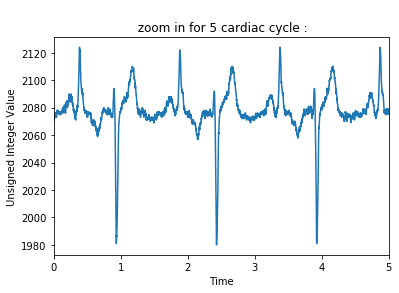

In [179]:
No_Samples=5250
x1=np.arange(0,No_Samples/fs,1/fs)

plt.plot(x1,All_signals[:No_Samples])
plt.xlim([0,7])
plt.title('\n zoom in for 5 cardiac cycle :')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')

plt.ticklabel_format(axis='x', scilimits=(0,0))


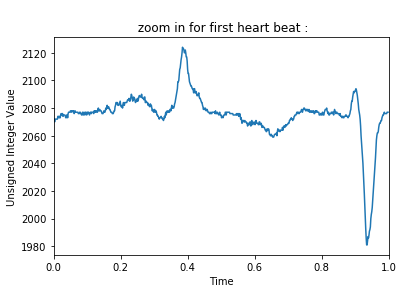

In [180]:
l=np.arange(0,fs/fs,1/fs)
plt.plot(l,All_signals[:720])
plt.title('\n zoom in for first heart beat :')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.xlim([0,1])
plt.ticklabel_format(style='sci',axis='x', scilimits=(0,0))


We can see that QRS complex curve is short which indicate that blood pressure of the person is low.

Peak value of QRS 2124
Heart beats per minute: 48


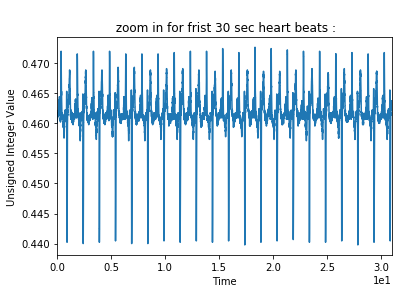

In [159]:
from matplotlib import gridspec

M=np.arange(25000)
S=0
#the frequencies after fft will be between 0 and 720Hz of the sampling frequency
x1=np.arange(0,25000/720.,1/720.)

plt.plot(x1,All_signals[:25000]/4500)

n=np.amax(All_signals[:720])
print 'Peak value of QRS ' +str (n)
for index in t:
    if All_signals[index]>=2124:
        S=S+1
print ('Heart beats per minute: ' +str(S*2) )       
        
plt.title('\n zoom in for frist 30 sec heart beats :')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.xlim([0,31])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))   


Peak value of DFT: 4.98149090804
Maximum value observed at f=1.39275766017


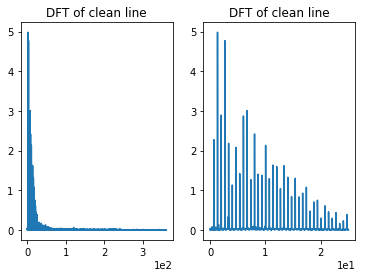

In [151]:

L=All_signals[:43080]
#we calculate the positive half of the signal
y=np.arange(21540)
#we first eliminate dc
F_data=L-np.mean(L)
L=len(F_data)

#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
f=np.arange(0,720/2.,720/43080.)
Y=np.fft.fft(F_data)
PyyClean=abs(Y)/L

 
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
plt.subplot(121)
plt.plot(f, PyyClean[:21540])
plt.title('DFT of clean line')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

#Zooming into just less than 25MHz
inx=np.where(f>25)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], PyyClean[:inx[0]])
plt.title('DFT of clean line')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

r=np.amax(PyyClean[:21540])
print 'Peak value of DFT: ' +str(r)

for index in y:
    if PyyClean[index]>=4.981:
        print 'Maximum value observed at f=' + str(index/57.44)  
        break 
       


** From the spectrum, calculation of teh heart rate in beats/minute.

**Heart rate is

** H=$\frac{60}{f}$
 
**F is frequency at peak observed:
 H=44

(12)  The peak detector is used to find the peaks in the signal envelope. Heart rate frequency is computed from R-R
      intervals. If the interval between two R-peaks is lower than the maximal physiological heart rate,
      the next R-peak is taken. It prevents failures caused by artefacts in signal from occurring.

(13)  It will depend upon the sample rate which are selected, and the number of bits of resolution enhancement.


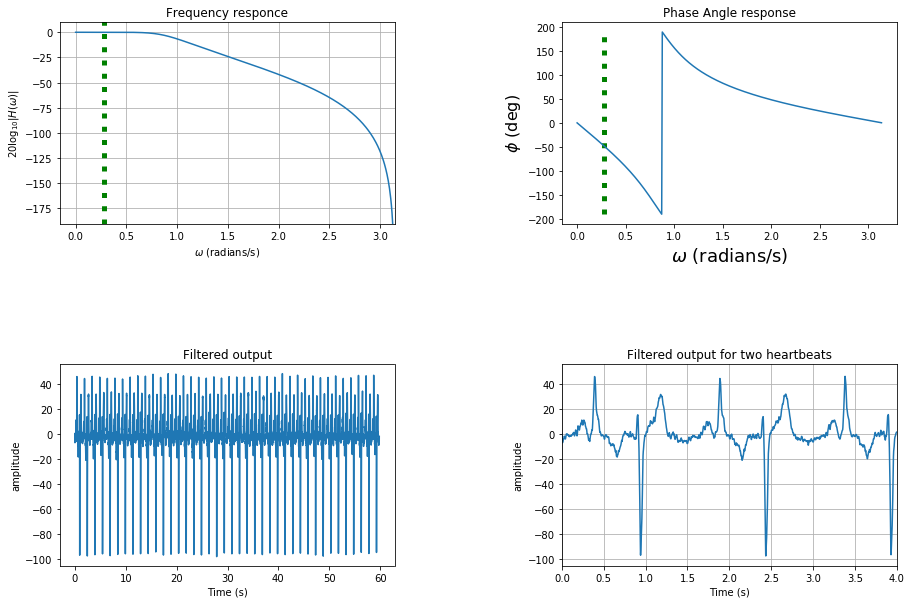

In [172]:
from matplotlib import gridspec

fig=plt.figure() ## create an axes object in the figure
fig.set_size_inches((15,10))

gs = gridspec.GridSpec(2,2) #specifies the geometry of the grid that a subplot will be placed
gs.update( wspace=0.5, hspace=0.7)

fs=720
nf=fs/2

cutf= 100
W=100/nf

b,a=signal.butter(4,W,btype='low',analog= False)
w,h=signal.freqz(b,a) ##we compute impulse response for the filter above (coefficients)
s=signal.lfilter(b,a,F_data)

x=np.arange(0,43080/720.,1/720.)

ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.set_title('Frequency responce')
#we plot the logarithmic response as a function of the frequency in radians
ax.plot(w, 20 * np.log10(abs(h)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $")
ax.set_xlabel(r'$\omega$ (radians/s)')

ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-190,ymax=10)
ax.vlines(W,-190,190,linestyles=':',color='g',lw=5.)
ax.grid()

ax = fig.add_subplot(plt.subplot(gs[0,1]))
plt.plot(w,np.angle(h)/np.pi*190)
ax.set_title('Phase Angle response')
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)
ax.vlines(W,-190,190,linestyles=':',color='g',lw=5.)

ax = fig.add_subplot(plt.subplot(gs[1,0]))
ax.plot(x,s)
ax.set_title('Filtered output')
ax.set_ylabel("amplitude")
ax.set_xlabel('Time (s)')

ax = fig.add_subplot(plt.subplot(gs[1,1]))
ax.plot(x,s)
ax.set_xlim(xmax = 4, xmin =0)
ax.set_title('Filtered output for two heartbeats')
ax.set_ylabel("amplitude")
ax.set_xlabel('Time (s)')

ax.grid()

Peak value of DFT data is 4.98133869968
Maximum value observed at f=1.39275766017


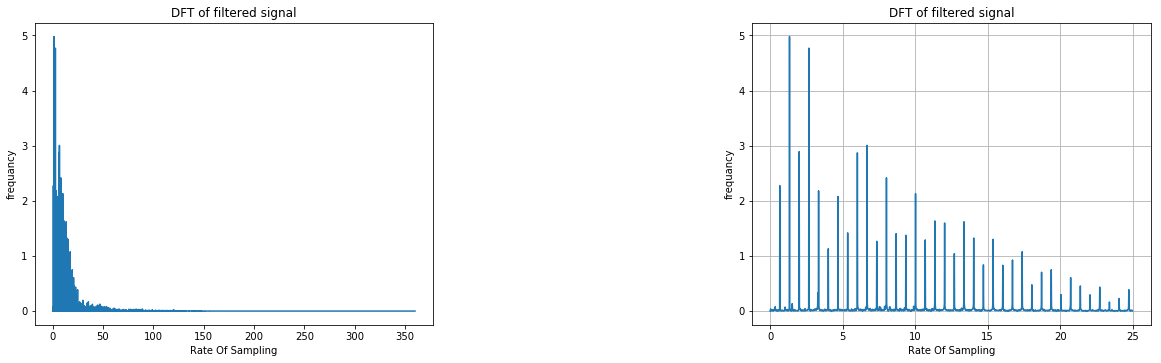

In [176]:
from matplotlib import gridspec
# create a figure object
fig=plt.figure()
fig.set_size_inches((20,15))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.8, hspace=0.7)

z=len(s)

#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
f_f=np.arange(0,720/2,720/43080.)
YY=np.fft.fft(s)
Pyy=abs(YY)/z

#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.plot(ff, Pyy[:21540])
ax.set_title('DFT of filtered signal')
ax.set_ylabel('frequancy')
ax.set_xlabel('Rate Of Sampling')

#Zooming into just less than 25MHz
indx=np.where(f_f>25)
indx=indx[0]
ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax.plot(ff[:indx[0]], Pyy[:indx[0]])
ax.set_title('DFT of filtered signal')
ax.set_ylabel('frequancy')
ax.set_xlabel('Rate Of Sampling')

ax.grid()

p=np.amax(Pyy[:21540])

print 'Peak value of DFT data is ' +str(p)

i=np.arange(21540)
for index in i:
    if Pyy[index]>=4.98:
        
        print 'Maximum value observed at f=' +str(index/57.44)  
        break 

References:


    1)	Biomedical Signal and Image Processing (2nd edition): Kayvan Najarian, Robert Splinter; Taylor and Francis
    group publications.
    
    2)	“Electrocardiogram (ECG) Signal Processing”. In: Encyclopedia of Biomedical Engineering by 
    LEIF SO¨ RNMO Lund University Sweden, PABLO LAGUNA Zaragoza University Spain.
    
    3)	Step-by-Step Method for Accurate Electrocardiogram Interpretation: M. Gabriel Khan © Humana Press Inc., 
    Totowa, NJ.Contemporary Cardiology: Rapid ECG Interpretation, 3e
    
    4)  Kohler, B.-U.; Hennig, C.; Orglmeister, R. The principles of software QRS detection. Engineering
    in Medicine and Biology Magazine IEEE, vol. 21, pp. 42 – 57, January -February 2002. 

